In [ ]:
!pip install dask[dataframe]
!pip install tensorflow-addons

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import mode
from sklearn.metrics import roc_curve, auc


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgb
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
import joblib
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RANSACRegressor
from sklearn.neural_network import MLPClassifier

In [ ]:

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import class_weight

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Reshape, MaxPooling1D, GlobalAveragePooling1D, Flatten
from tensorflow.keras.layers import Input
from sklearn.preprocessing import StandardScaler

In [ ]:
from tensorflow.keras.losses import BinaryFocalCrossentropy
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:
bureau_final = pd.read_csv('/content/drive/MyDrive/UMD/DATA602_DATA_Science/Project/Data Segregator /Code/SavedData/finalized_bureau.csv')
bureau = pd.read_csv("/content/drive/MyDrive/UMD/DATA602_DATA_Science/Project/home-credit-default-risk/bureau.csv")
application_train = pd.read_csv("/content/drive/MyDrive/UMD/DATA602_DATA_Science/Project/home-credit-default-risk/application_train.csv")

In [ ]:
print(bureau_final.shape)
bureau_final = bureau_final.dropna(subset=["TARGET"])
bureau_final.reset_index(drop=True, inplace=True)
print(bureau_final.shape)

(1465325, 36)
(1465325, 36)


In [ ]:
aggregation_functions = {}
for col in bureau_final.columns:
    if col != 'SK_ID_CURR' and col != 'SK_ID_PREV':
        aggregation_functions[col] = ['mean', 'sum', 'min', 'max']
bureau_final_aggr = bureau_final.groupby('SK_ID_CURR').agg(aggregation_functions)
bureau_final_aggr.columns = ['_'.join(col).strip() for col in bureau_final_aggr.columns.values]
bureau_final_aggr.reset_index(inplace=True)
bureau_final_aggr.head()

,SK_ID_CURR,vin_num_times_delinquent_last_3_months_mean,vin_num_times_delinquent_last_3_months_sum,vin_num_times_delinquent_last_3_months_min,vin_num_times_delinquent_last_3_months_max,vin_num_overdue_loans_last_3_months_mean,vin_num_overdue_loans_last_3_months_sum,vin_num_overdue_loans_last_3_months_min,vin_num_overdue_loans_last_3_months_max,vin_total_overdue_amount_last_3_months_mean,...,vin_credit_utilization_std_min,vin_credit_utilization_std_max,vin_max_debt_amount_max_mean,vin_max_debt_amount_max_sum,vin_max_debt_amount_max_min,vin_max_debt_amount_max_max,TARGET_mean,TARGET_sum,TARGET_min,TARGET_max
0,100002,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,245781.0,1966248.0,245781.0,245781.0,1.0,8.0,1.0,1.0
1,100003,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100007,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100008,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,240057.0,720171.0,240057.0,240057.0,0.0,0.0,0.0,0.0


In [ ]:
bureau_final_aggr.shape

(263491, 141)

In [ ]:
# Drop the identifier column before feature selection
y = bureau_final_aggr['TARGET_max']  # Target variable
X = bureau_final_aggr.drop(columns=['TARGET_mean', 'TARGET_sum','TARGET_min', 'TARGET_max', 'SK_ID_CURR']) # Features excluding the identifier

In [ ]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
X.describe()

,vin_num_times_delinquent_last_3_months_mean,vin_num_times_delinquent_last_3_months_sum,vin_num_times_delinquent_last_3_months_min,vin_num_times_delinquent_last_3_months_max,vin_num_overdue_loans_last_3_months_mean,vin_num_overdue_loans_last_3_months_sum,vin_num_overdue_loans_last_3_months_min,vin_num_overdue_loans_last_3_months_max,vin_total_overdue_amount_last_3_months_mean,vin_total_overdue_amount_last_3_months_sum,...,vin_credit_utilization_min_min,vin_credit_utilization_min_max,vin_credit_utilization_std_mean,vin_credit_utilization_std_sum,vin_credit_utilization_std_min,vin_credit_utilization_std_max,vin_max_debt_amount_max_mean,vin_max_debt_amount_max_sum,vin_max_debt_amount_max_min,vin_max_debt_amount_max_max
count,126.000000,263491.000000,126.000000,126.000000,149.000000,263491.000000,149.000000,149.000000,38479.000000,2.634910e+05,...,4.885200e+04,4.885200e+04,555.000000,263491.000000,555.000000,555.000000,2.561310e+05,2.634910e+05,2.561310e+05,2.561310e+05
mean,1.023810,0.003882,1.023810,1.023810,1.020134,0.004531,1.020134,1.020134,13.892600,2.325677e+01,...,3.156384e+02,3.156384e+02,551.926231,3.842525,551.926231,551.926231,5.216275e+05,3.671958e+06,5.216275e+05,5.216275e+05
std,0.153064,0.226897,0.153064,0.153064,0.140933,0.241447,0.140933,0.140933,675.531799,3.950361e+03,...,9.778512e+03,9.778512e+03,5682.902783,830.006998,5682.902783,5682.902783,1.343224e+06,1.296526e+07,1.343224e+06,1.343224e+06
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,...,-1.578947e+04,-1.578947e+04,0.000000,0.000000,0.000000,0.000000,-2.595965e+04,-2.595965e+04,-2.595965e+04,-2.595965e+04
25%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,...,1.000000e+00,1.000000e+00,0.308600,0.000000,0.308600,0.308600,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,...,1.366431e+00,1.366431e+00,2.386889,0.000000,2.386889,2.386889,1.494585e+05,5.742438e+05,1.494585e+05,1.494585e+05
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,...,9.279271e+00,9.279271e+00,12.592123,0.000000,12.592123,12.592123,4.950000e+05,2.919874e+06,4.950000e+05,4.950000e+05
max,2.000000,40.000000,2.000000,2.000000,2.000000,40.000000,2.000000,2.000000,83925.000000,1.594575e+06,...,1.285714e+06,1.285714e+06,101014.710755,303044.132266,101014.710755,101014.710755,1.701000e+08,3.231900e+09,1.701000e+08,1.701000e+08


In [ ]:
X

,vin_num_times_delinquent_last_3_months_mean,vin_num_times_delinquent_last_3_months_sum,vin_num_times_delinquent_last_3_months_min,vin_num_times_delinquent_last_3_months_max,vin_num_overdue_loans_last_3_months_mean,vin_num_overdue_loans_last_3_months_sum,vin_num_overdue_loans_last_3_months_min,vin_num_overdue_loans_last_3_months_max,vin_total_overdue_amount_last_3_months_mean,vin_total_overdue_amount_last_3_months_sum,...,vin_credit_utilization_min_min,vin_credit_utilization_min_max,vin_credit_utilization_std_mean,vin_credit_utilization_std_sum,vin_credit_utilization_std_min,vin_credit_utilization_std_max,vin_max_debt_amount_max_mean,vin_max_debt_amount_max_sum,vin_max_debt_amount_max_min,vin_max_debt_amount_max_max
0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,1.0,1.0,NaN,0.0,NaN,NaN,245781.0,1966248.0,245781.0,245781.0
1,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,1.0,1.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
2,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
3,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
4,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,240057.0,720171.0,240057.0,240057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263486,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,2193390.0,24127290.0,2193390.0,2193390.0
263487,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,163071.0,2119923.0,163071.0,163071.0
263488,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,1624797.0,6499188.0,1624797.0,1624797.0
263489,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0


In [ ]:
y.head(7)

,TARGET_max
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0


In [ ]:
# Feature selection using RandomForest to determine important features
feature_selector = RandomForestClassifier(n_estimators=100, random_state=42)
feature_selector.fit(X, y)
selector = SelectFromModel(feature_selector, threshold='median', prefit=True)
X_selected = selector.transform(X)

X_selected_df = pd.DataFrame(X_selected, columns=X.columns[selector.get_support()])
X_selected_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


,vin_total_overdue_amount_last_24_months_mean,vin_total_overdue_amount_last_24_months_sum,vin_total_overdue_amount_last_24_months_max,vin_total_overdue_amount_last_36_months_mean,vin_total_overdue_amount_last_36_months_max,days_since_last_default_min_mean,days_since_last_default_min_sum,days_since_last_default_min_min,days_since_last_default_min_max,vin_days_since_last_loan_closure_max_mean,...,vin_credit_utilization_sum_sum,vin_credit_utilization_mean_sum,vin_credit_utilization_min_mean,vin_credit_utilization_min_sum,vin_credit_utilization_min_min,vin_credit_utilization_min_max,vin_max_debt_amount_max_mean,vin_max_debt_amount_max_sum,vin_max_debt_amount_max_min,vin_max_debt_amount_max_max
0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,36.0,...,NaN,NaN,1.0,8.0,1.0,1.0,245781.0,1966248.0,245781.0,245781.0
1,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,540.0,...,NaN,NaN,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,382.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,783.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,790.0,...,NaN,NaN,NaN,NaN,NaN,NaN,240057.0,720171.0,240057.0,240057.0


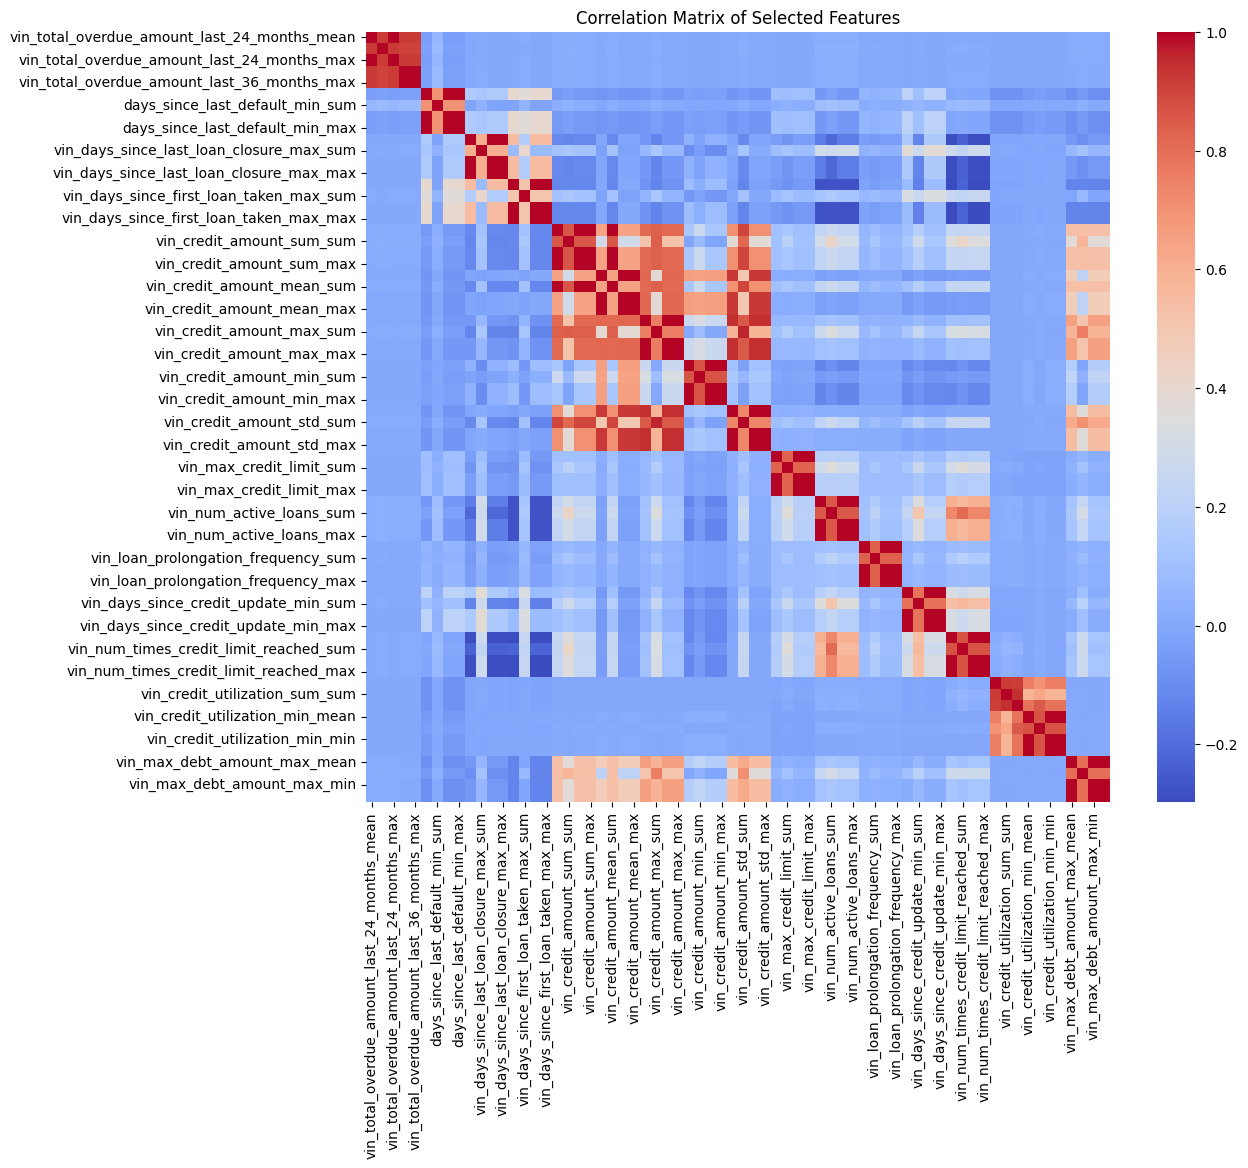

In [ ]:
# Calculate the correlation matrix
correlation_matrix = X_selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()

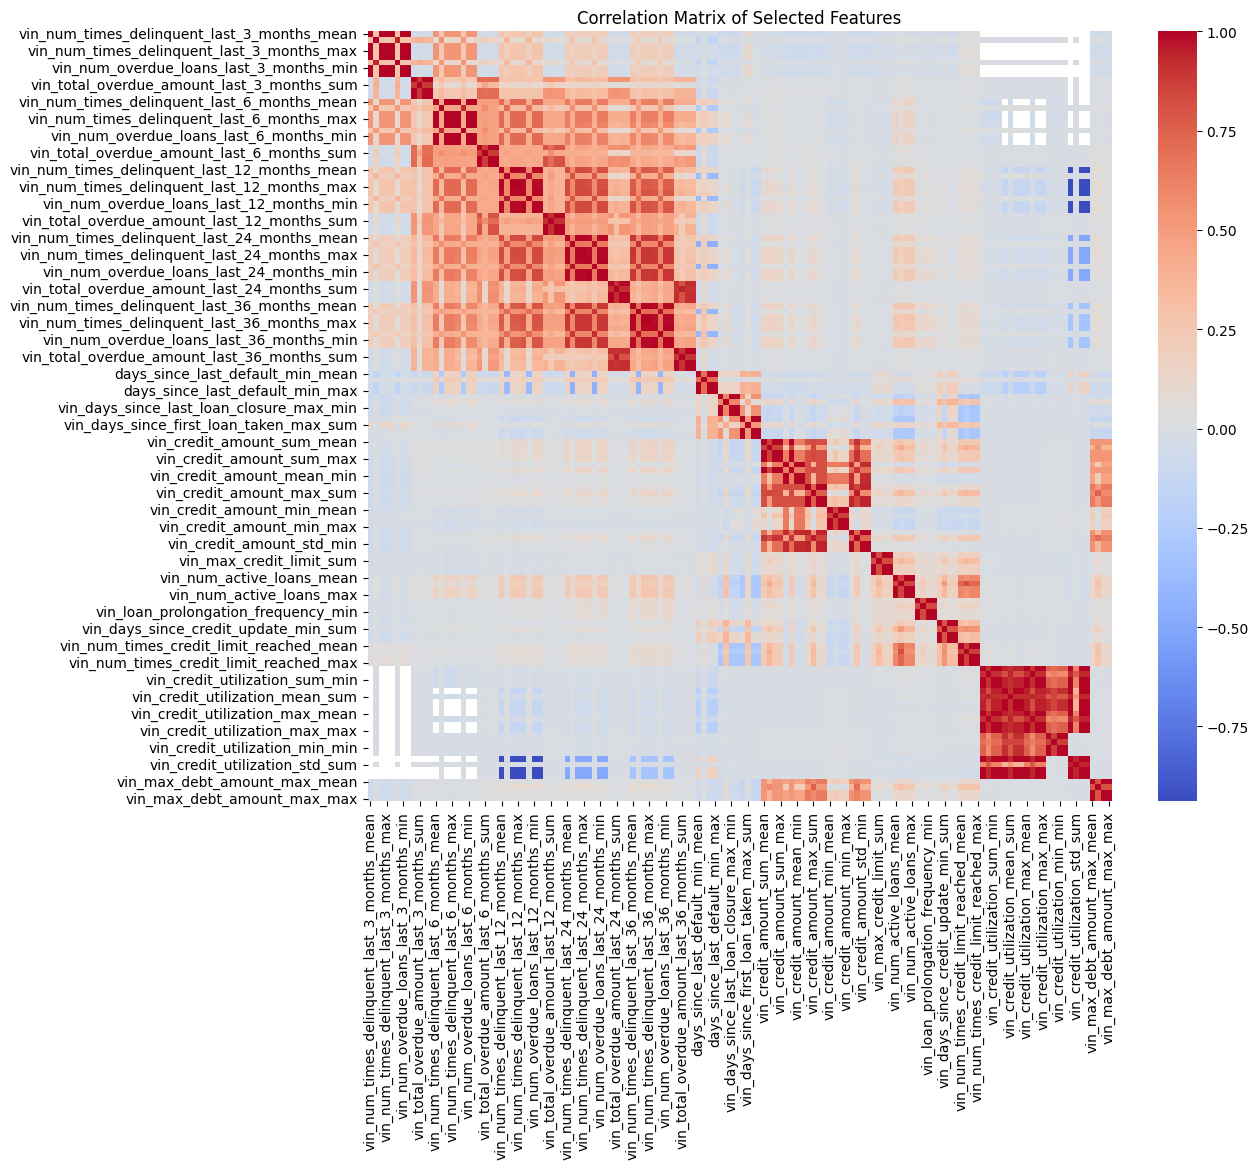

In [ ]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [ ]:
 X_selected_df.fillna(-(10e10-1), inplace=True)

In [ ]:
X.fillna(-(10e10-1), inplace=True)

In [ ]:
class ModelClassifier:
    def __init__(self, y_train):
        self.class_weight = self.calculate_class_weights(y_train)
        self.models = self.define_model_classifiers()

    def calculate_class_weights(self, y_train):
        return {0: len(y_train) / (2 * len(y_train[y_train == 0])),
                1: len(y_train) / (2 * len(y_train[y_train == 1]))}

    def define_model_classifiers(self):
        models = {
            "RandomForest": RandomForestClassifier(class_weight=self.class_weight, random_state=42),
            "GradientBoosting": GradientBoostingClassifier(random_state=42),
            "XGBoost": xgb.XGBClassifier(scale_pos_weight=self.class_weight[0] / self.class_weight[1]),
            "LightGBM": lgb.LGBMClassifier(is_unbalance=True)
        }
        return models

    def train_and_evaluate(self, X_train, X_test, y_train, y_test):
        for model_name, model in self.models.items():
            print(f"Training and evaluating {model_name}...")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

            # Save model weights
            joblib.dump(model, f"{model_name}_model.pkl")

            # Print classification report
            print(f"{model_name} - Classification Report:")
            print(classification_report(y_test, y_pred))

            # Calculate and print ROC-AUC score if available
            if y_pred_proba is not None:
                roc_auc = roc_auc_score(y_test, y_pred_proba)
                print(f"{model_name} - ROC-AUC Score: {roc_auc}\n")
            else:
                print(f"{model_name} - ROC-AUC Score: Not applicable\n")

            # Confusion Matrix
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title(f'Confusion Matrix for {model_name}')
            plt.show()

            # ROC Curve if probabilities are available
            if y_pred_proba is not None:
                from sklearn.metrics import roc_curve, auc
                fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
                roc_auc = auc(fpr, tpr)
                plt.figure(figsize=(10, 6))
                plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
                plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'Receiver Operating Characteristic - {model_name}')
                plt.legend(loc='lower right')
                plt.show()


Training and evaluating RandomForest...
RandomForest - Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     48648
         1.0       0.33      0.00      0.01      4051

    accuracy                           0.92     52699
   macro avg       0.63      0.50      0.48     52699
weighted avg       0.88      0.92      0.89     52699

RandomForest - ROC-AUC Score: 0.6000009118446273



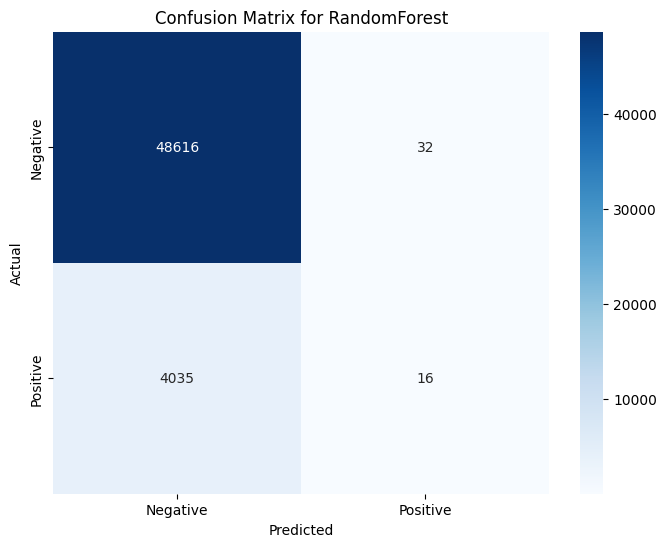

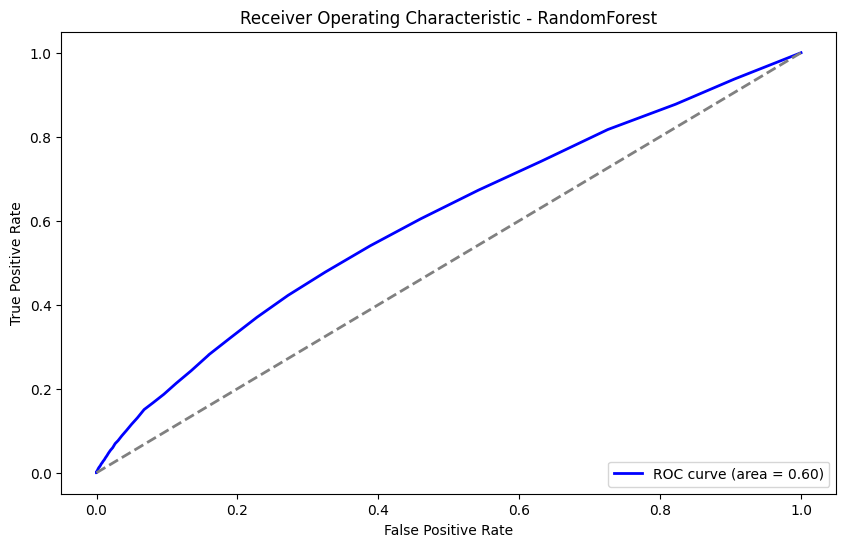

Training and evaluating GradientBoosting...
GradientBoosting - Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     48648
         1.0       0.38      0.00      0.00      4051

    accuracy                           0.92     52699
   macro avg       0.65      0.50      0.48     52699
weighted avg       0.88      0.92      0.89     52699

GradientBoosting - ROC-AUC Score: 0.6445058458729476



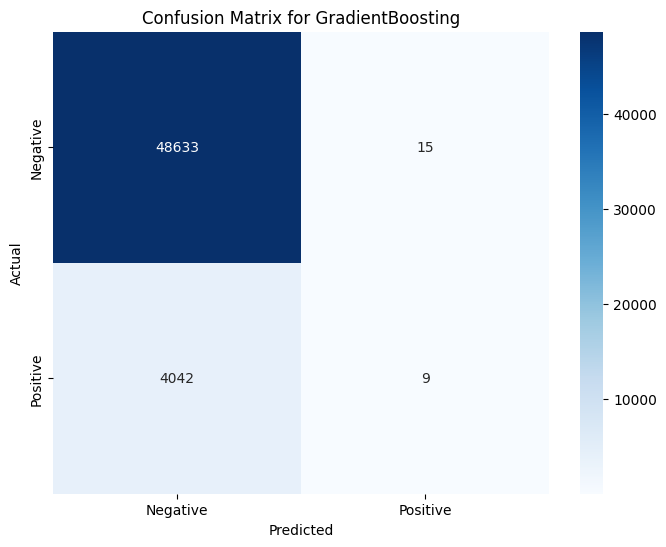

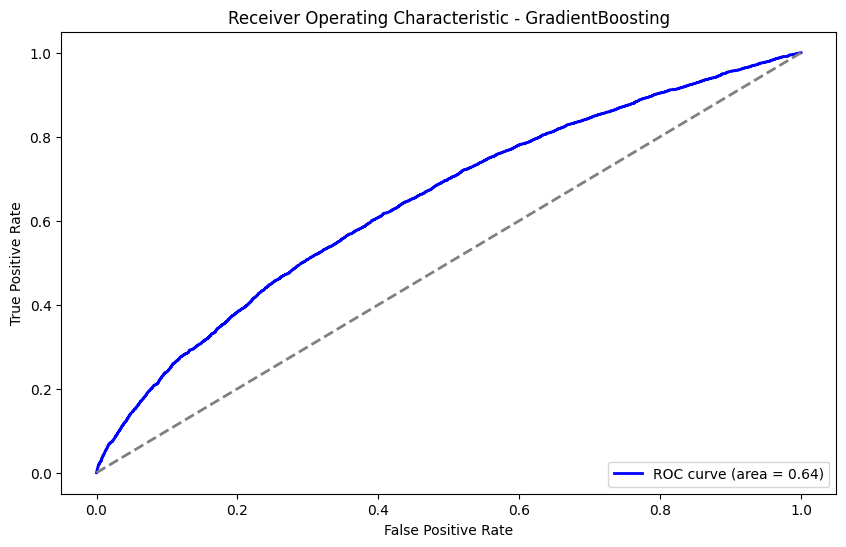

Training and evaluating XGBoost...
XGBoost - Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     48648
         1.0       0.00      0.00      0.00      4051

    accuracy                           0.92     52699
   macro avg       0.46      0.50      0.48     52699
weighted avg       0.85      0.92      0.89     52699

XGBoost - ROC-AUC Score: 0.639014876859265



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


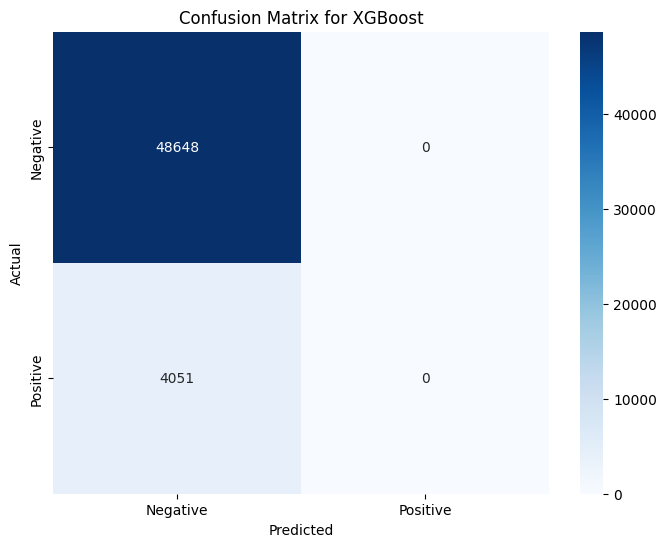

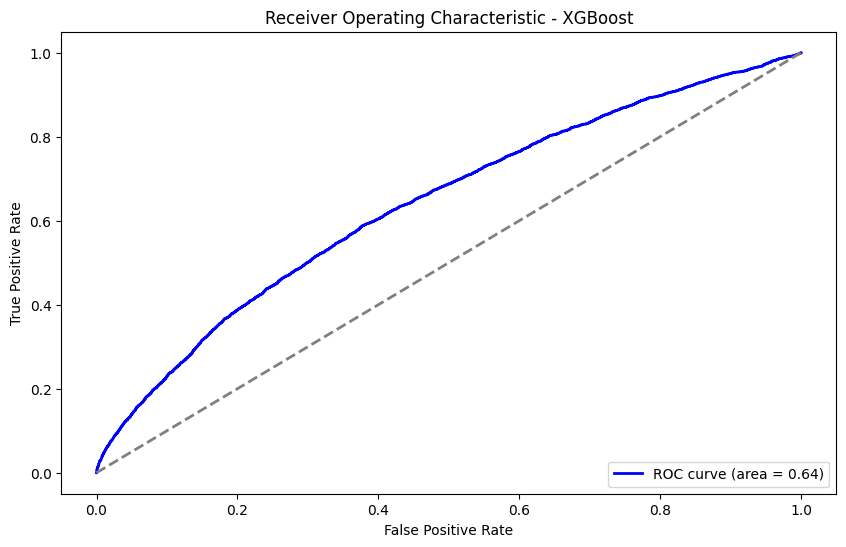

Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 16317, number of negative: 194475
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14986
[LightGBM] [Info] Number of data points in the train set: 210792, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.077408 -> initscore=-2.478096
[LightGBM] [Info] Start training from score -2.478096
LightGBM - Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.67      0.78     48648
         1.0       0.12      0.55      0.20      4051

    accuracy                           0.66     52699
   macro avg       0.53      0.61      0.49     52699
weighted avg       0.88      0.66      0.74     52699

LightGBM - ROC-AUC Score: 0.64563341507764

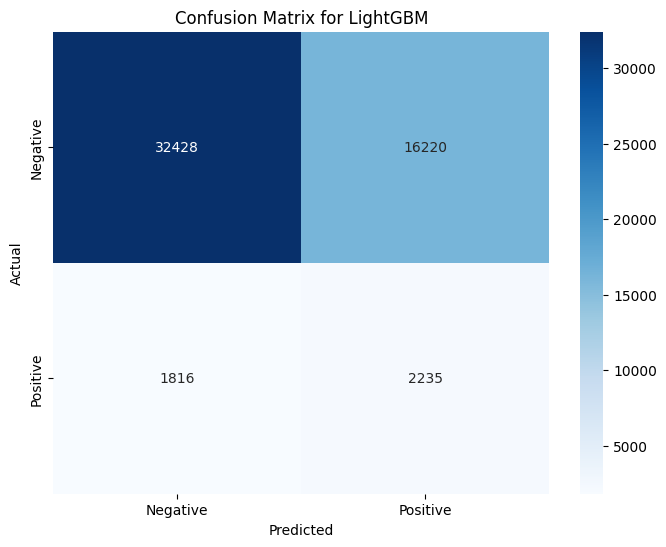

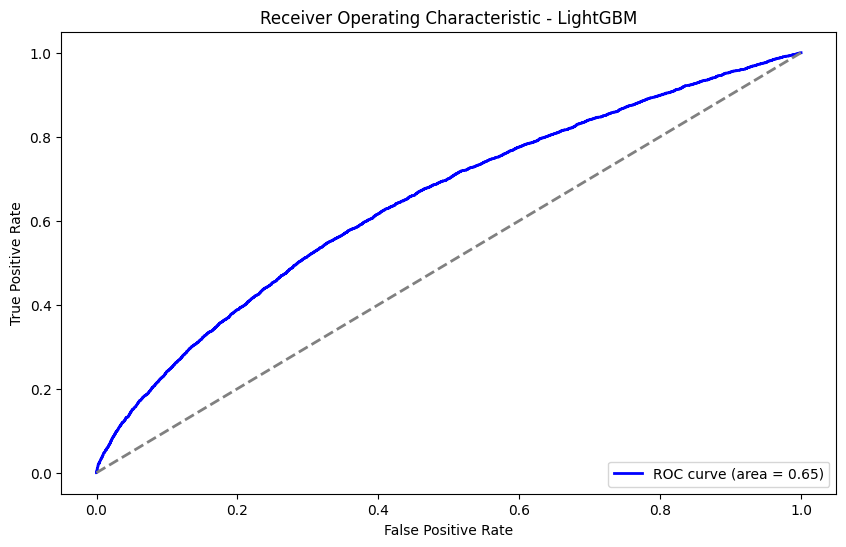

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)
model_classifier = ModelClassifier(y_train)
model_classifier.train_and_evaluate(X_train, X_test, y_train, y_test)

In [ ]:
class CustomMetric(tf.keras.metrics.Metric):
    def __init__(self, name='custom_metric', **kwargs):
        super(CustomMetric, self).__init__(name=name, **kwargs)
        self.recall = tf.keras.metrics.Recall()
        self.accuracy = tf.keras.metrics.Accuracy()
        self.precision = tf.keras.metrics.Precision()

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred_rounded = tf.round(y_pred)
        self.recall.update_state(y_true, y_pred_rounded, sample_weight)
        self.accuracy.update_state(y_true, y_pred_rounded, sample_weight)
        self.precision.update_state(y_true, y_pred_rounded, sample_weight)
    # 𝛽  β: Controls the weight of recall relative to precision.
    # 𝛽 > 1
    # β>1: Recall is more important.
    # 𝛽 < 1
    # β<1: Precision is more important.
    # 𝛽 = 1
    # β=1: Equal importance (standard F1 score).
    def result(self,beta=1.5):
        recall_result = self.recall.result()
        precision_result = self.precision.result()
        accuracy_result = self.accuracy.result()
        # Weighted average (adjust weights as needed)
        custom_f1 = (1+beta**2) * (precision_result * recall_result) / (precision_result + (beta**2)*recall_result+1)
        return custom_f1#0.6 * recall_result + 0.1 * accuracy_result + 0.3 * precision_result

    def reset_state(self):
        self.recall.reset_state()
        self.accuracy.reset_state()
        self.precision.reset_state()


class NeuralNetworkClassifier:
    def __init__(self, input_dim, y_train):
        # Ensure y_train is a NumPy array
        if isinstance(y_train, pd.Series):
            y_train_np = y_train.to_numpy()
        else:
            y_train_np = np.array(y_train)

        self.class_weight = self.calculate_class_weights(y_train_np)
        self.model = self.build_model(input_dim)


    def calculate_class_weights(self, y_train_np):
        # Compute class weights using sklearn's utility
        classes = np.unique(y_train_np)
        cw = class_weight.compute_class_weight('balanced', classes=classes, y=y_train_np)
        class_w_dict = {i: w for i, w in zip(classes, cw)}
        return class_w_dict

    def build_model(self, input_dim):
        model = Sequential([
            Input(shape=(input_dim,)),  # Use Input layer to define input shape
            Dense(128, activation='relu'),
            Dropout(0.4),
            Dense(64, activation='relu'),
            Dropout(0.4),
            Dense(32, activation='relu'),
            # Dropout(0.4),
            Dense(16, activation='relu'),
            # Dropout(0.0),
            # Dense(12, activation='relu'),
            # Dropout(0.2),
            Dense(1, activation='sigmoid')
        ])
        return model

    def train_and_evaluate(self, X_train, X_test, y_train, y_test, epochs=50, batch_size=32):
        print("Training and evaluating Neural Network...")

        # Convert y_train and y_test to NumPy arrays for compatibility with Keras
        if isinstance(y_train, pd.Series):
            y_train_np = y_train.to_numpy()
        else:
            y_train_np = np.array(y_train)

        if isinstance(y_test, pd.Series):
            y_test_np = y_test.to_numpy()
        else:
            y_test_np = np.array(y_test)
        # Add custom metric to the model compilation
        focal_loss = tf.keras.losses.BinaryFocalCrossentropy(alpha=0.3, gamma=2.0)

        # model.compile(optimizer='adam', loss=focal_loss, metrics=['accuracy', CustomMetric()])
        custom_metric = CustomMetric()
        self.model.compile(
            optimizer='adam',
            loss = focal_loss,
            metrics=['accuracy',custom_metric]
        )#'binary_crossentropy',

        # Model checkpoint callback
        model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath='LO_best_model_weights.weights.h5',
            save_weights_only=True,
            monitor='val_custom_metric',  # Monitor the custom metric
            mode='max',
            save_best_only=True
        )

        # Train the model
        history = self.model.fit(
            X_train, y_train_np,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_test, y_test_np),
            verbose=1,
            class_weight=self.class_weight,
            callbacks=[model_checkpoint_callback]
        )

        # Evaluate the model on test set
        eval_results = self.model.evaluate(X_test, y_test_np, verbose=0)
        loss, accuracy, custom_metric_value = eval_results  # Unpack all three values
        print(f"Neural Network - Test Loss: {loss:.4f}, Accuracy: {accuracy:.4f}, Custom Metric: {custom_metric_value:.4f}")
        # eval_results should be [loss, accuracy, custom_metric_value]
        # loss, custom_metric_value = eval_results
        # print(f"Neural Network - Test Loss: {loss:.4f},  Custom Metric: {custom_metric_value:.4f}")

        # Predict probabilities
        y_pred_proba = self.model.predict(X_test)
        # Calculate ROC-AUC score
        roc_auc = roc_auc_score(y_test_np, y_pred_proba)
        print(f"Neural Network - ROC-AUC Score: {roc_auc:.4f}")

        # Confusion Matrix
        y_pred = (y_pred_proba > 0.5).astype(int)
        cm = confusion_matrix(y_test_np, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix for Neural Network')
        plt.show()

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test_np, y_pred_proba)
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for Neural Network')
        plt.legend(loc="lower right")
        plt.show()

        # Plot Loss vs Epoch
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss vs Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        y_value_pred_train_proba = self.model.predict(X_train)
        return y_pred_proba, y_value_pred_train_proba


Training and evaluating Neural Network...
Epoch 1/10
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.5247 - custom_metric: 0.0554 - loss: 450089984.0000 - val_accuracy: 0.0770 - val_custom_metric: 0.0751 - val_loss: 16.6473
Epoch 2/10
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.5223 - custom_metric: 0.0556 - loss: 288857.1875 - val_accuracy: 0.0769 - val_custom_metric: 0.0751 - val_loss: 0.1833
Epoch 3/10
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.5134 - custom_metric: 0.0560 - loss: 67337.7109 - val_accuracy: 0.0769 - val_custom_metric: 0.0751 - val_loss: 0.1799
Epoch 4/10
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.5019 - custom_metric: 0.0568 - loss: 17873.3770 - val_accuracy: 0.9231 - val_custom_metric: 0.0000e+00 - val_loss: 0.1720
Epoch 5/10
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.5414 - custom_metric: 0.0529 - loss: 39540.4688 - val_accuracy: 0.0769 - val_custom_metric: 0.0751 - val_loss: 0.1799
Epoch 6/10
65

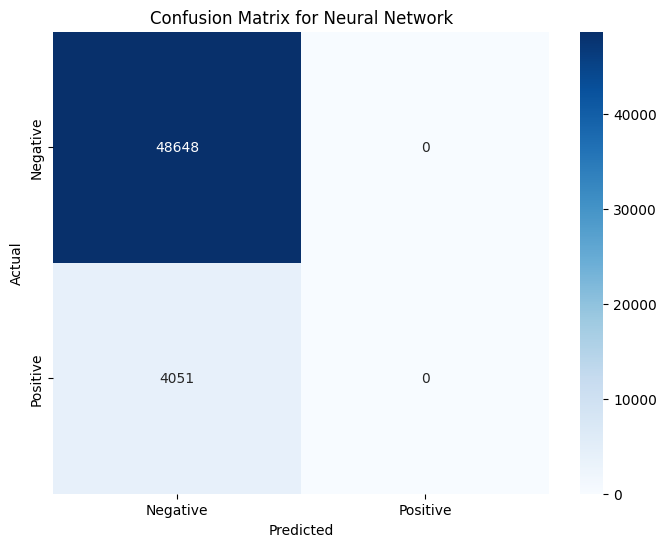

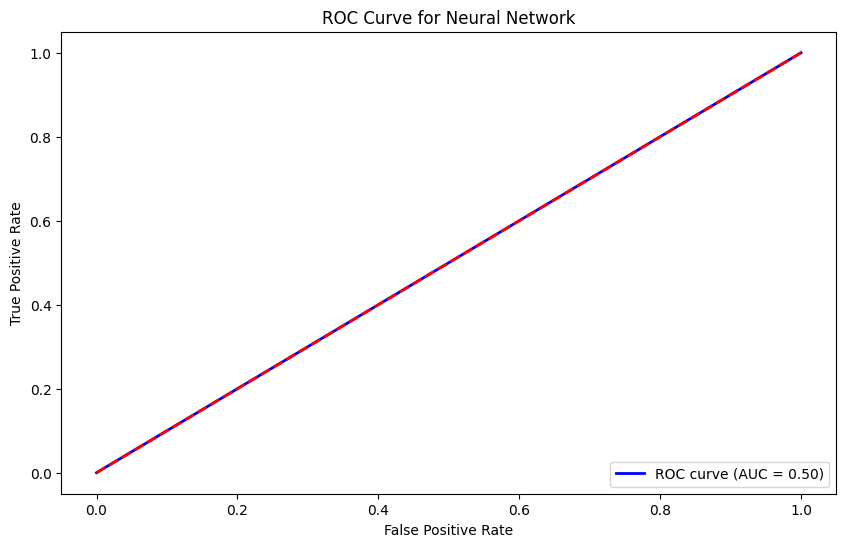

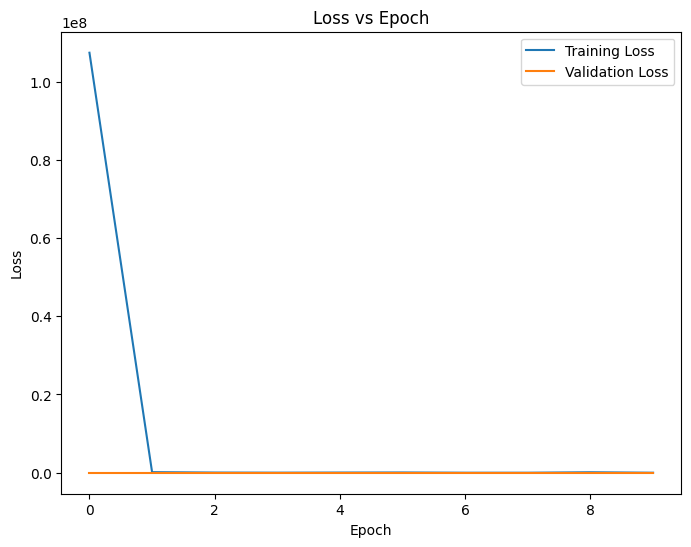

6588/6588 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


In [ ]:
input_dim = X_train.shape[1]
neural_network_classifier = NeuralNetworkClassifier(input_dim, y_train)
y_pred_proba, y_value_pred_train_proba = neural_network_classifier.train_and_evaluate(X_train, X_test, y_train, y_test, epochs=10)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# # Feature Selection
# from sklearn.feature_selection import RFE

# # Use RFE for feature selection
# selector = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=50) # Select 50 features
# selector.fit(X, y)
# X_selected = selector.transform(X)

In [ ]:
# # Model Training
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid for hyperparameter tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10]
# }

# # Use GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best model
# best_model = grid_search.best_estimator_

# # Model Evaluation
# from sklearn.metrics import classification_report, roc_auc_score

# # Evaluate the model
# y_pred = best_model.predict(X_test)
# print(classification_report(y_test, y_pred))
# print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

In [ ]:
@keras.saving.register_keras_serializable()
class CustomMetric(tf.keras.metrics.Metric):
    def __init__(self, name='custom_metric', beta=1.0, **kwargs):
        super(CustomMetric, self).__init__(name=name, **kwargs)
        self.beta = beta
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred_rounded = tf.round(y_pred)
        self.precision.update_state(y_true, y_pred_rounded, sample_weight)
        self.recall.update_state(y_true, y_pred_rounded, sample_weight)

    def result(self):
        precision_result = self.precision.result()
        recall_result = self.recall.result()
        beta_squared = self.beta ** 2
        f1_score = (1 + beta_squared) * (precision_result * recall_result) / \
                   (beta_squared * precision_result + recall_result + 1e-7)
        return f1_score

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()


# Neural Network Classifier
class NeuralNetworkClassifier:
    def __init__(self, input_dim, y_train):
        self.class_weights = self.calculate_class_weights(y_train)
        self.model = self.build_model(input_dim)

    @staticmethod
    def calculate_class_weights(y_train):
        class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        return {i: w for i, w in enumerate(class_weights)}

    def build_model(self, input_dim):
        model = Sequential([
            Input(shape=(input_dim,)),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(64, activation='relu'),
            Dropout(0.5),
            Dense(32, activation='relu'),
            Dropout(0.3),
            Dense(1, activation='sigmoid')
        ])
        return model

    def train_and_evaluate(self, X_train, X_test, y_train, y_test, epochs=50, batch_size=32, beta=1.0):

        # Convert y_train and y_test to NumPy arrays for compatibility
        if isinstance(y_train, pd.Series) or isinstance(y_train, pd.DataFrame):
            y_train = y_train.values.flatten()
        if isinstance(y_test, pd.Series) or isinstance(y_test, pd.DataFrame):
            y_test = y_test.values.flatten()
        # Compile the model
        focal_loss = BinaryFocalCrossentropy(alpha=0.3, gamma=2.0)
        custom_metric = CustomMetric(beta=beta)

        self.model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=focal_loss,
            metrics=['accuracy', custom_metric]
        )

        # Callbacks
        # early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        # model_checkpoint = ModelCheckpoint(
        #     'best_model.h5', save_best_only=True, monitor='val_loss', mode='min'
        # )
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        model_checkpoint = ModelCheckpoint(
            'best_model.keras', save_best_only=True, monitor='val_loss', mode='min'  # Changed file extension to .keras
        )
        # Train the model
        history = self.model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_test, y_test),
            class_weight=self.class_weights,
            callbacks=[early_stopping, model_checkpoint],
            verbose=1
        )

        # Evaluate the model
        test_loss, test_accuracy, custom_metric_value = self.model.evaluate(X_test, y_test, verbose=0)
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Custom Metric (F1): {custom_metric_value:.4f}")

        # Predict probabilities
        y_pred_proba = self.model.predict(X_test)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        print(f"ROC-AUC Score: {roc_auc:.4f}")

        # Confusion Matrix
        y_pred = (y_pred_proba > 0.5).astype(int)
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

        # Loss vs Epoch Plot
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss vs Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        return y_pred_proba


# Example usage:
# nn_classifier = NeuralNetworkClassifier(input_dim=X_train.shape[1], y_train=y_train)
# y_pred_proba = nn_classifier.train_and_evaluate(X_train, X_test, y_train, y_test, epochs=50, batch_size=32, beta=1.5)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train

array([[-0.02187289, -0.01711128, -0.02187289, ..., -0.28321565,
        -5.89918701, -5.89918701],
       [-0.02187289, -0.01711128, -0.02187289, ...,  7.80418295,
         0.16972797,  0.16972797],
       [-0.02187289, -0.01711128, -0.02187289, ..., -0.28321565,
         0.16948323,  0.16948323],
       ...,
       [-0.02187289, -0.01711128, -0.02187289, ..., -0.24576203,
         0.16948912,  0.16948912],
       [-0.02187289, -0.01711128, -0.02187289, ..., -0.28321565,
         0.16948323,  0.16948323],
       [-0.02187289, -0.01711128, -0.02187289, ...,  0.42667243,
         0.16951608,  0.16951608]])

Epoch 1/50
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.5350 - custom_metric: 0.1459 - loss: 0.2024 - val_accuracy: 0.8843 - val_custom_metric: 0.1375 - val_loss: 0.1622
Epoch 2/50
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.6591 - custom_metric: 0.1665 - loss: 0.1726 - val_accuracy: 0.7183 - val_custom_metric: 0.1866 - val_loss: 0.1706
Epoch 3/50
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.6918 - custom_metric: 0.1705 - loss: 0.1705 - val_accuracy: 0.6649 - val_custom_metric: 0.1841 - val_loss: 0.1699
Epoch 4/50
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.6725 - custom_metric: 0.1751 - loss: 0.1723 - val_accuracy: 0.8107 - val_custom_metric: 0.1867 - val_loss: 0.1596
Epoch 5/50
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.7102 - custom_metric: 0.1715 - loss: 0.1712 - val_accuracy: 0.7398 - val_custom_metric: 0.1803 - val_loss: 0.1732
Epoch 6/50
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.7139 - custom_me

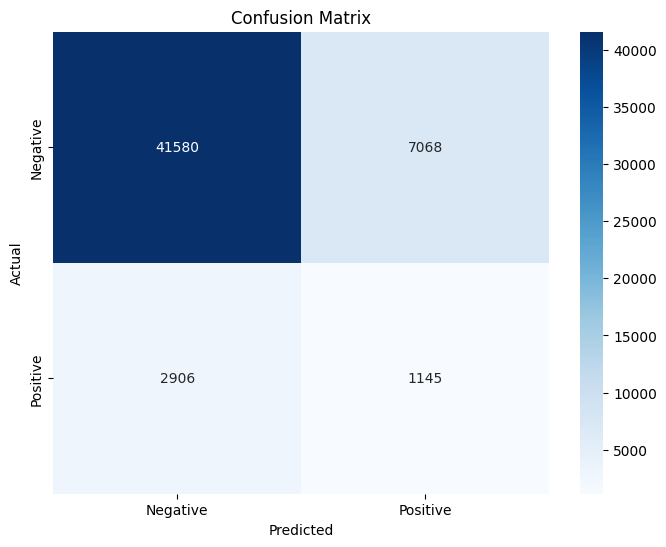

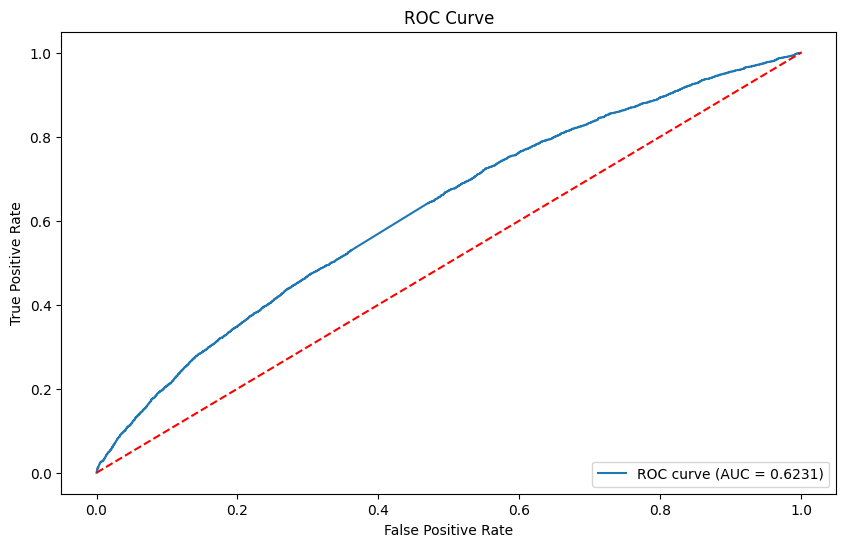

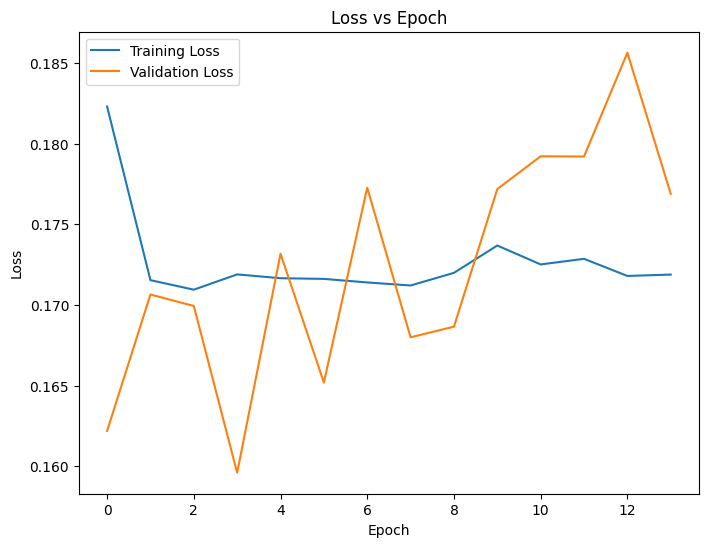

In [ ]:
input_dim = X_train.shape[1]
# nn_classifier = NeuralNetworkClassifier(input_dim=X_train.shape[1], y_train=y_train)
neural_network_classifier = NeuralNetworkClassifier(input_dim, y_train)
y_pred_proba = neural_network_classifier.train_and_evaluate(X_train, X_test, y_train, y_test, epochs=50)


In [ ]:
y_train.shape

(210792,)

In [ ]:
y.shape

(263491,)

In [ ]:
X_train.shape

(210792, 136)

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('best_model.keras', custom_objects={'CustomMetric': CustomMetric})

1647/1647 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
Accuracy: 0.8107
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89     48648
         1.0       0.14      0.28      0.19      4051

    accuracy                           0.81     52699
   macro avg       0.54      0.57      0.54     52699
weighted avg       0.87      0.81      0.84     52699



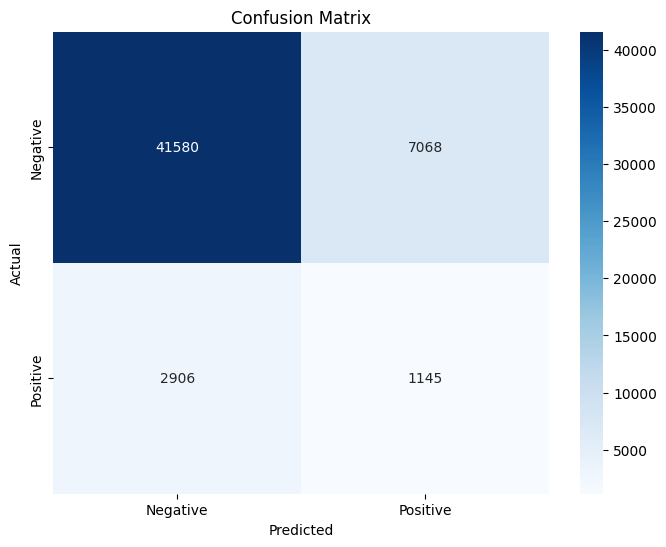

In [ ]:
# Assuming X_test and y_test are available
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to predictions

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (includes accuracy)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

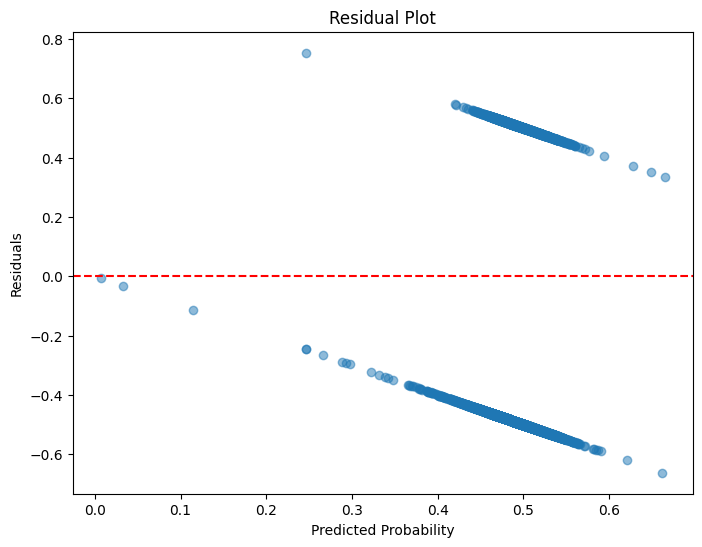

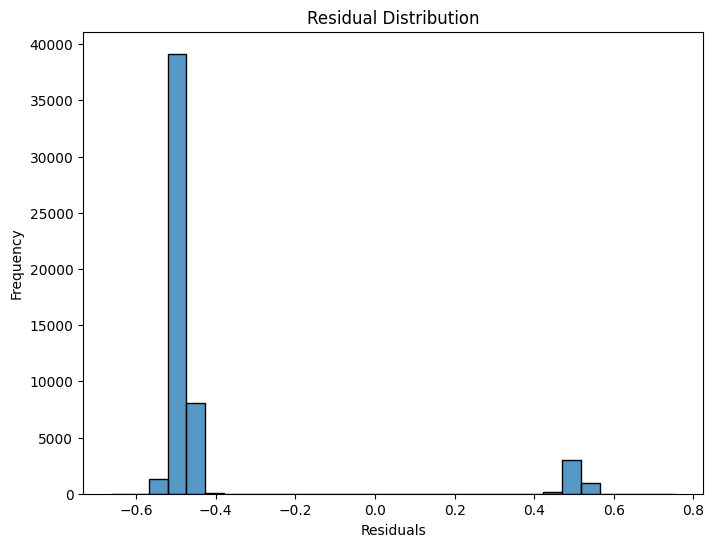

In [ ]:
# Calculate Residuals
residuals = y_test - y_pred_proba.flatten()  # Flatten y_pred_proba for compatibility

# Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_proba, residuals, alpha=0.5)
plt.xlabel('Predicted Probability')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.show()

# Residual Distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

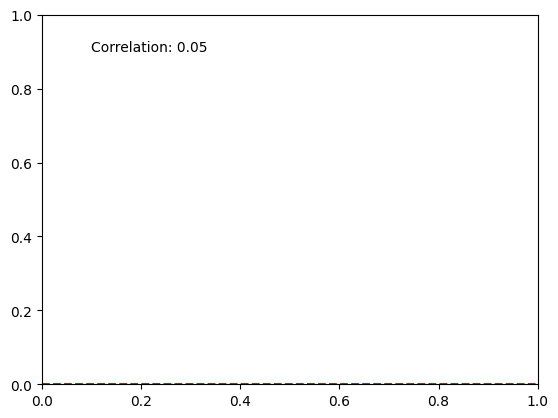

In [ ]:
correlation = np.corrcoef(y_pred_proba.flatten(), residuals)[0, 1]
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at 0
plt.show()

In [ ]:
X

,vin_num_times_delinquent_last_3_months_mean,vin_num_times_delinquent_last_3_months_sum,vin_num_times_delinquent_last_3_months_min,vin_num_times_delinquent_last_3_months_max,vin_num_overdue_loans_last_3_months_mean,vin_num_overdue_loans_last_3_months_sum,vin_num_overdue_loans_last_3_months_min,vin_num_overdue_loans_last_3_months_max,vin_total_overdue_amount_last_3_months_mean,vin_total_overdue_amount_last_3_months_sum,...,vin_credit_utilization_min_min,vin_credit_utilization_min_max,vin_credit_utilization_std_mean,vin_credit_utilization_std_sum,vin_credit_utilization_std_min,vin_credit_utilization_std_max,vin_max_debt_amount_max_mean,vin_max_debt_amount_max_sum,vin_max_debt_amount_max_min,vin_max_debt_amount_max_max
0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,1.0,1.0,NaN,0.0,NaN,NaN,245781.0,1966248.0,245781.0,245781.0
1,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,1.0,1.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
2,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
3,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
4,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,240057.0,720171.0,240057.0,240057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263486,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,2193390.0,24127290.0,2193390.0,2193390.0
263487,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,163071.0,2119923.0,163071.0,163071.0
263488,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,1624797.0,6499188.0,1624797.0,1624797.0
263489,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import train_test_split

# # ... (your previous code for loading data and defining the NeuralNetworkClassifier) ...

# # KNN Imputation
# imputer = KNNImputer(n_neighbors=5)  # Use 5 nearest neighbors
# X_imputed = imputer.fit_transform(X)  # X is your original data with NaNs

# # Convert back to DataFrame (if necessary)
# X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# # # Split data into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.2, random_state=42)
# X_imputed_df

In [ ]:
X_scaled = X.copy()
X_scaled.fillna(-(10e10-1), inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train

array([[-0.02187289, -0.01711128, -0.02187289, ..., -0.28321565,
        -5.89918701, -5.89918701],
       [-0.02187289, -0.01711128, -0.02187289, ...,  7.80418295,
         0.16972797,  0.16972797],
       [-0.02187289, -0.01711128, -0.02187289, ..., -0.28321565,
         0.16948323,  0.16948323],
       ...,
       [-0.02187289, -0.01711128, -0.02187289, ..., -0.24576203,
         0.16948912,  0.16948912],
       [-0.02187289, -0.01711128, -0.02187289, ..., -0.28321565,
         0.16948323,  0.16948323],
       [-0.02187289, -0.01711128, -0.02187289, ...,  0.42667243,
         0.16951608,  0.16951608]])

Epoch 1/50
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.5359 - custom_metric: 0.1454 - loss: 0.1962 - val_accuracy: 0.7116 - val_custom_metric: 0.1860 - val_loss: 0.1681
Epoch 2/50
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.6523 - custom_metric: 0.1705 - loss: 0.1710 - val_accuracy: 0.8445 - val_custom_metric: 0.1735 - val_loss: 0.1618
Epoch 3/50
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.6923 - custom_metric: 0.1730 - loss: 0.1704 - val_accuracy: 0.4121 - val_custom_metric: 0.1479 - val_loss: 0.1804
Epoch 4/50
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.6686 - custom_metric: 0.1731 - loss: 0.1718 - val_accuracy: 0.7060 - val_custom_metric: 0.1808 - val_loss: 0.1583
Epoch 5/50
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.7077 - custom_metric: 0.1783 - loss: 0.1703 - val_accuracy: 0.6656 - val_custom_metric: 0.1849 - val_loss: 0.1662
Epoch 6/50
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.6847 - custom_me

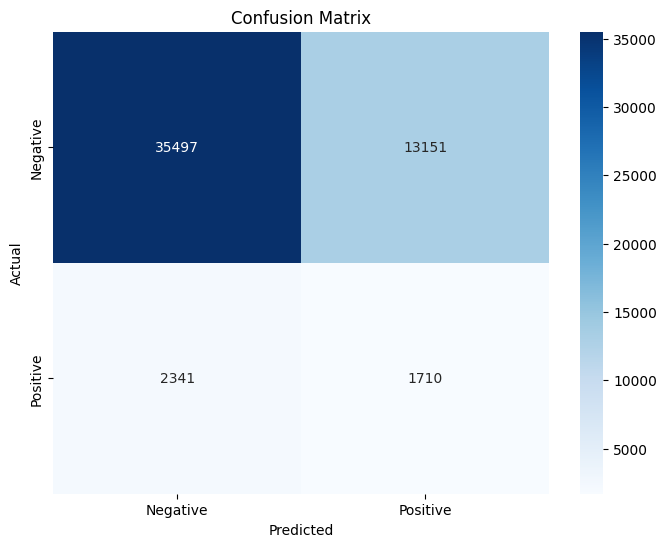

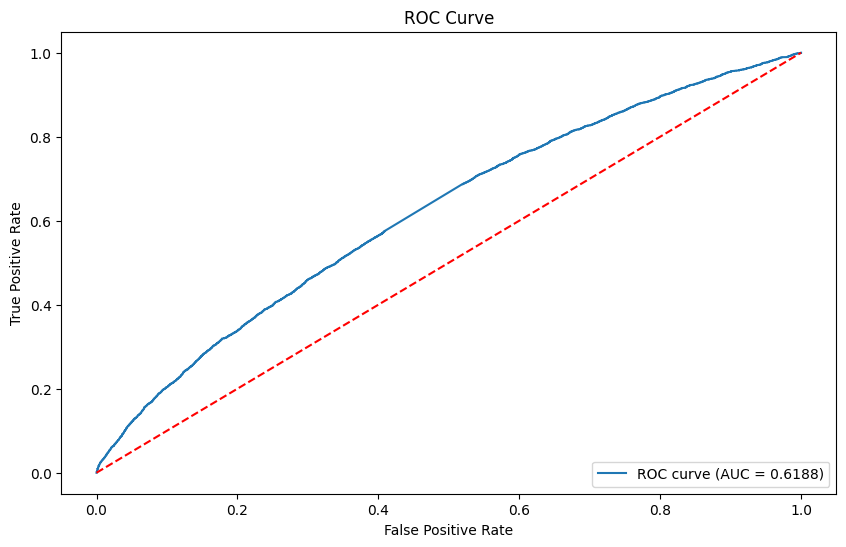

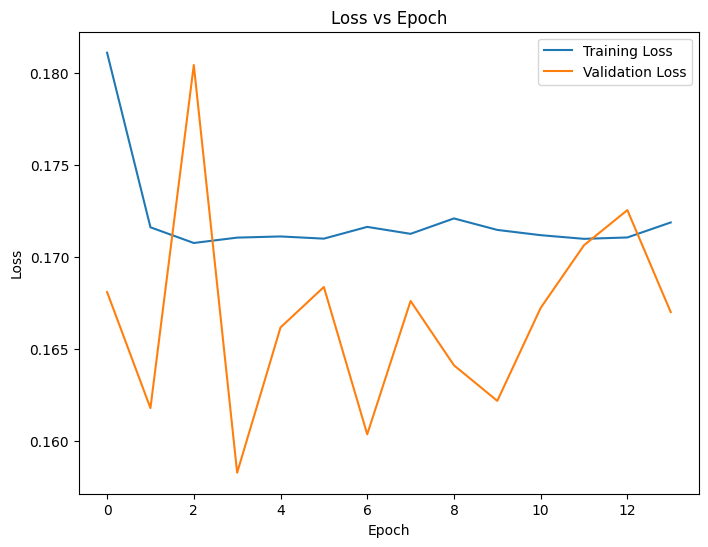

In [ ]:
input_dim = X_train.shape[1]
# nn_classifier = NeuralNetworkClassifier(input_dim=X_train.shape[1], y_train=y_train)
neural_network_classifier = NeuralNetworkClassifier(input_dim, y_train)
y_pred_proba = neural_network_classifier.train_and_evaluate(X_train, X_test, y_train, y_test, epochs=50)

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('best_model.keras', custom_objects={'CustomMetric': CustomMetric})

1647/1647 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Accuracy: 0.7060
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     48648
         1.0       0.12      0.42      0.18      4051

    accuracy                           0.71     52699
   macro avg       0.53      0.58      0.50     52699
weighted avg       0.87      0.71      0.77     52699



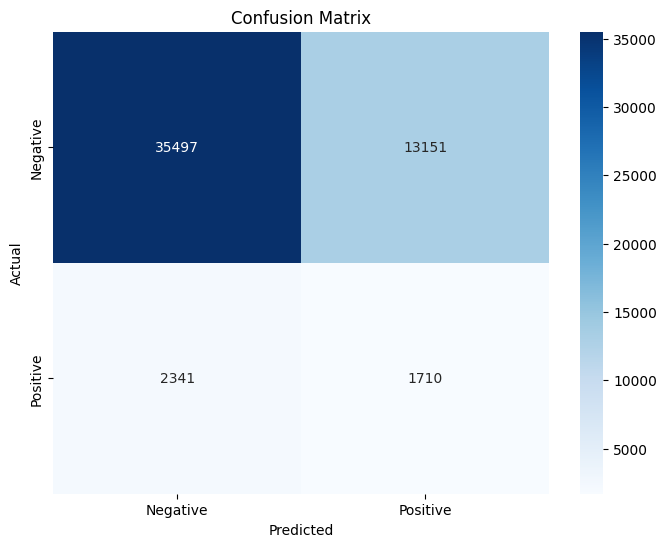

In [ ]:
# Assuming X_test and y_test are available
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to predictions

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (includes accuracy)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

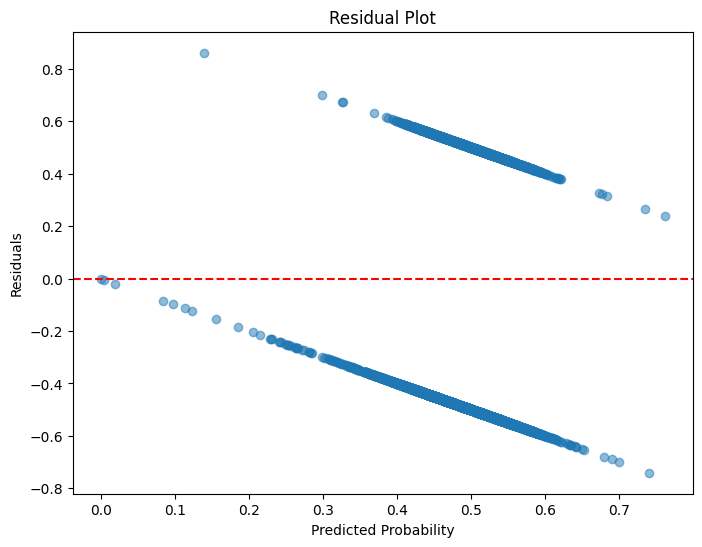

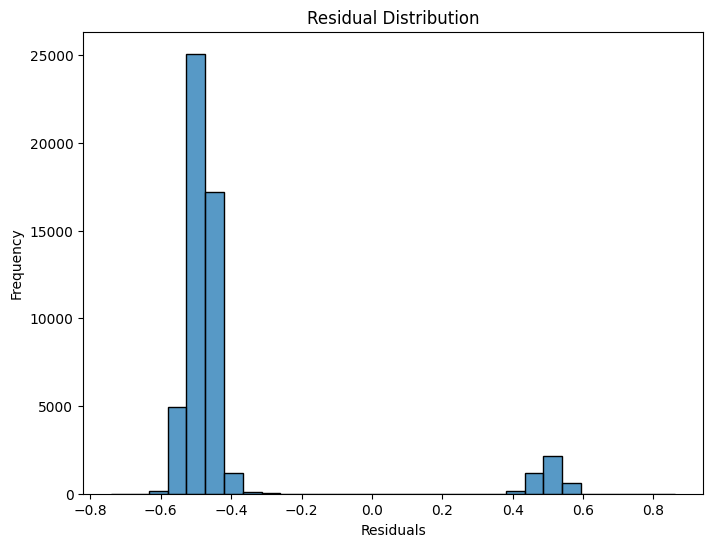

In [ ]:
# Calculate Residuals
residuals = y_test - y_pred_proba.flatten()  # Flatten y_pred_proba for compatibility

# Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_proba, residuals, alpha=0.5)
plt.xlabel('Predicted Probability')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.show()

# Residual Distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

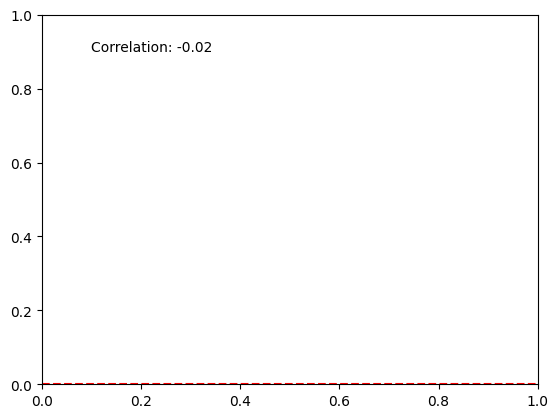

In [ ]:
correlation = np.corrcoef(y_pred_proba.flatten(), residuals)[0, 1]
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at 0
plt.show()

In [ ]:
import joblib

class ModelPersistence:
    def __init__(self, filename):
        self.filename = filename

    def dump(self, obj):
        """Saves an object to a file using joblib."""
        joblib.dump(obj, self.filename)
        print(f"Object saved to {self.filename}")

    def load(self):
        """Loads an object from a file using joblib."""
        try:
            obj = joblib.load(self.filename)
            print(f"Object loaded from {self.filename}")
            return obj
        except FileNotFoundError:
            print(f"File {self.filename} not found.")
            return None

In [ ]:
persistence = ModelPersistence('standard_scaler.pkl')
persistence.dump(scaler)

Object saved to standard_scaler.pkl
